In [6]:
import pandas as pd
from data_loader import load_data
from split_training_testing_by_time import split_data_by_time
from adding_seasonality import add_seasonality
from models import all_features_no_seasonality, all_features_with_seasonality, removing_prect_prsn, removing_ubot_vbot, only_qbot_fsns


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [7]:
# List of file paths
file_paths = [
    "D:/Earth and Environ Data Sci/003_2006_2080_352_360.nc",
    "D:/Earth and Environ Data Sci/004_2006_2080_352_360.nc",
    "D:/Earth and Environ Data Sci/005_2006_2080_352_360.nc",
    "D:/Earth and Environ Data Sci/006_2006_2080_352_360.nc",
    "D:/Earth and Environ Data Sci/007_2006_2080_352_360.nc",
    "D:/Earth and Environ Data Sci/008_2006_2080_352_360.nc"
]

# Load data
df, manchester = load_data(file_paths)

# Split data by time
train_df, test_df = split_data_by_time(manchester, start_date='2050-01-01', end_date='2080-12-31')

time          False
lat           False
lon           False
TREFMXAV_U    False
FLNS          False
FSNS          False
PRECT         False
PRSN          False
QBOT          False
UBOT          False
VBOT          False
dtype: bool
Unique latitude values: [49.47644  50.41885  51.361256 52.303665 53.246075 54.18848  55.13089
 56.0733   57.015705 57.958115 58.900524]
Unique longitude values: [358.75 355.   356.25 357.5  352.5  353.75]


D:\Earth and Environ Data Sci\Project-2-Workflow\data_loader.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manchester['time'] = pd.to_datetime(manchester['time'], format='%Y-%m-%d %H:%M:%S')


In [8]:
train_df.head()

,time,lat,lon,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,UBOT,VBOT
17,2006-01-02,53.246075,357.5,282.775848,41.925179,25.926952,4.663135e-09,4.781004e-17,0.004769,3.878579,1.394184
59,2006-01-03,53.246075,357.5,284.471130,8.905806,10.946910,8.046593e-08,1.295726e-16,0.006271,1.788157,3.821703
101,2006-01-04,53.246075,357.5,284.287964,16.511415,6.405902,2.910935e-09,4.094447e-16,0.005782,0.804845,-2.299140
143,2006-01-05,53.246075,357.5,282.121094,29.948362,9.315041,7.432505e-11,0.000000e+00,0.004277,-1.100267,-1.258029
185,2006-01-06,53.246075,357.5,280.890900,19.064156,7.941241,6.894238e-12,0.000000e+00,0.003990,-0.706321,-0.938421


In [9]:
test_df.head()

,time,lat,lon,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,UBOT,VBOT
674495,2050-01-01,53.246075,357.5,286.526764,12.634629,3.559634,2.189261e-07,9.891280e-17,0.006935,5.193449,10.004021
674537,2050-01-02,53.246075,357.5,286.693420,35.906631,13.466964,2.219194e-07,4.433377e-15,0.006126,6.641515,5.846309
674579,2050-01-03,53.246075,357.5,283.206848,46.371471,23.419794,1.253089e-07,4.660791e-17,0.004333,2.290553,4.642627
674621,2050-01-04,53.246075,357.5,284.392212,63.616577,28.498390,1.478794e-08,1.602239e-19,0.004336,7.307600,4.322647
674663,2050-01-05,53.246075,357.5,281.760193,55.179695,17.610100,5.324842e-09,0.000000e+00,0.003943,-0.125417,-0.585838


Research Questions:
1. Sensitivity of the Inputs to the Model
2. Comparative Analysis of Learning Models: Linear Regression, Random Forest and XGBoost


Inputs: VBOT UBOT PRECT FLNS PRSN FSNS QBOT

In [10]:
print("Metrics for models without seasonality:")
metrics_no_seasonality = all_features_no_seasonality(train_df, test_df)

Metrics for models without seasonality:
Metrics:
Linear Regression: R-squared = 0.91794165703809, RMSE = 1.5484613180160522
Random Forest: R-squared = 0.945731572510122, RMSE = 1.2592518970031457
XGBoost: R-squared = 0.9565862855200655, RMSE = 1.1262959241867065

Best Model(s): ['XGBoost']


Adding Seasonality

In [11]:
mcr_with_seasonality = add_seasonality(manchester)

D:\Earth and Environ Data Sci\Project-2-Workflow\adding_seasonality.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['time'].dt.year
D:\Earth and Environ Data Sci\Project-2-Workflow\adding_seasonality.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['time'].dt.month
D:\Earth and Environ Data Sci\Project-2-Workflow\adding_seasonality.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [12]:
mcr_with_seasonality.head()

,time,lat,lon,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,UBOT,VBOT,year,month,season,season_enc
17,2006-01-02,53.246075,357.5,282.775848,41.925179,25.926952,4.663135e-09,4.781004e-17,0.004769,3.878579,1.394184,2006,1,Winter,1
59,2006-01-03,53.246075,357.5,284.471130,8.905806,10.946910,8.046593e-08,1.295726e-16,0.006271,1.788157,3.821703,2006,1,Winter,1
101,2006-01-04,53.246075,357.5,284.287964,16.511415,6.405902,2.910935e-09,4.094447e-16,0.005782,0.804845,-2.299140,2006,1,Winter,1
143,2006-01-05,53.246075,357.5,282.121094,29.948362,9.315041,7.432505e-11,0.000000e+00,0.004277,-1.100267,-1.258029,2006,1,Winter,1
185,2006-01-06,53.246075,357.5,280.890900,19.064156,7.941241,6.894238e-12,0.000000e+00,0.003990,-0.706321,-0.938421,2006,1,Winter,1


In [13]:
szn_train_df, szn_test_df = split_data_by_time(mcr_with_seasonality, start_date='2050-01-01', end_date='2080-12-31')

In [14]:
szn_train_df = szn_train_df.drop(['lat', 'lon', 'season', 'year', 'month', 'time'], axis=1)
szn_test_df = szn_test_df.drop(['lat', 'lon', 'season', 'year', 'month', 'time'], axis=1)



Inputs: VBOT UBOT PRECT FLNS PRSN season_enc FSNS QBOT


Metrics for models with seasonality:
Metrics:
Linear Regression: R-squared = 0.92293763145465, RMSE = 1.5005835167977422
Random Forest: R-squared = 0.947184623653095, RMSE = 1.242279116336757
XGBoost: R-squared = 0.9568748339094295, RMSE = 1.1225465536117554

Best Model(s): ['XGBoost']


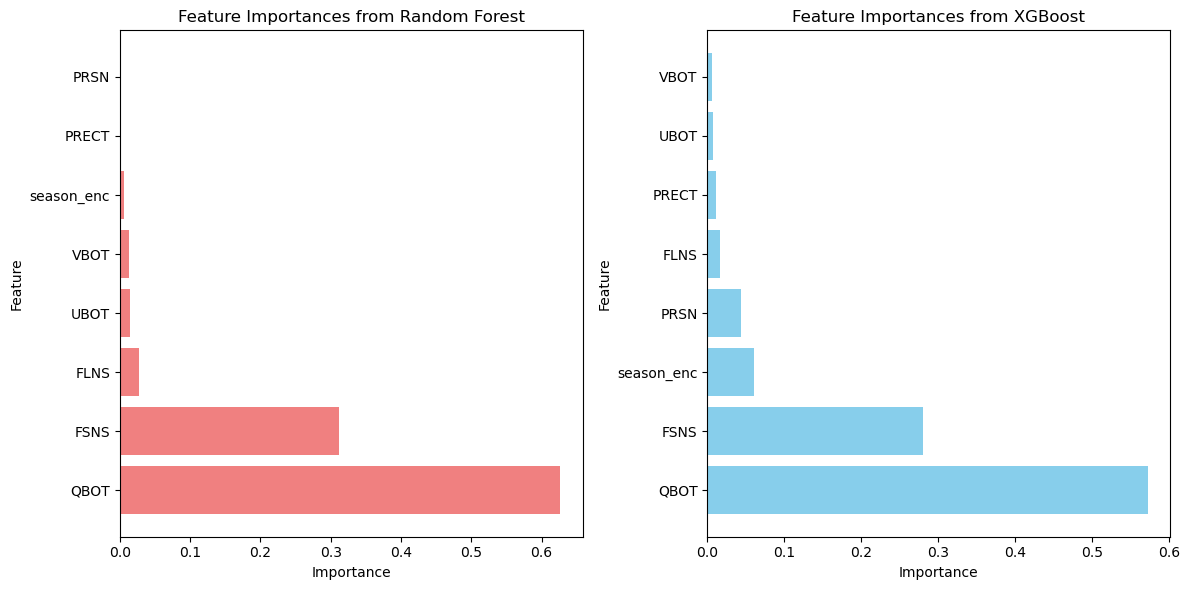

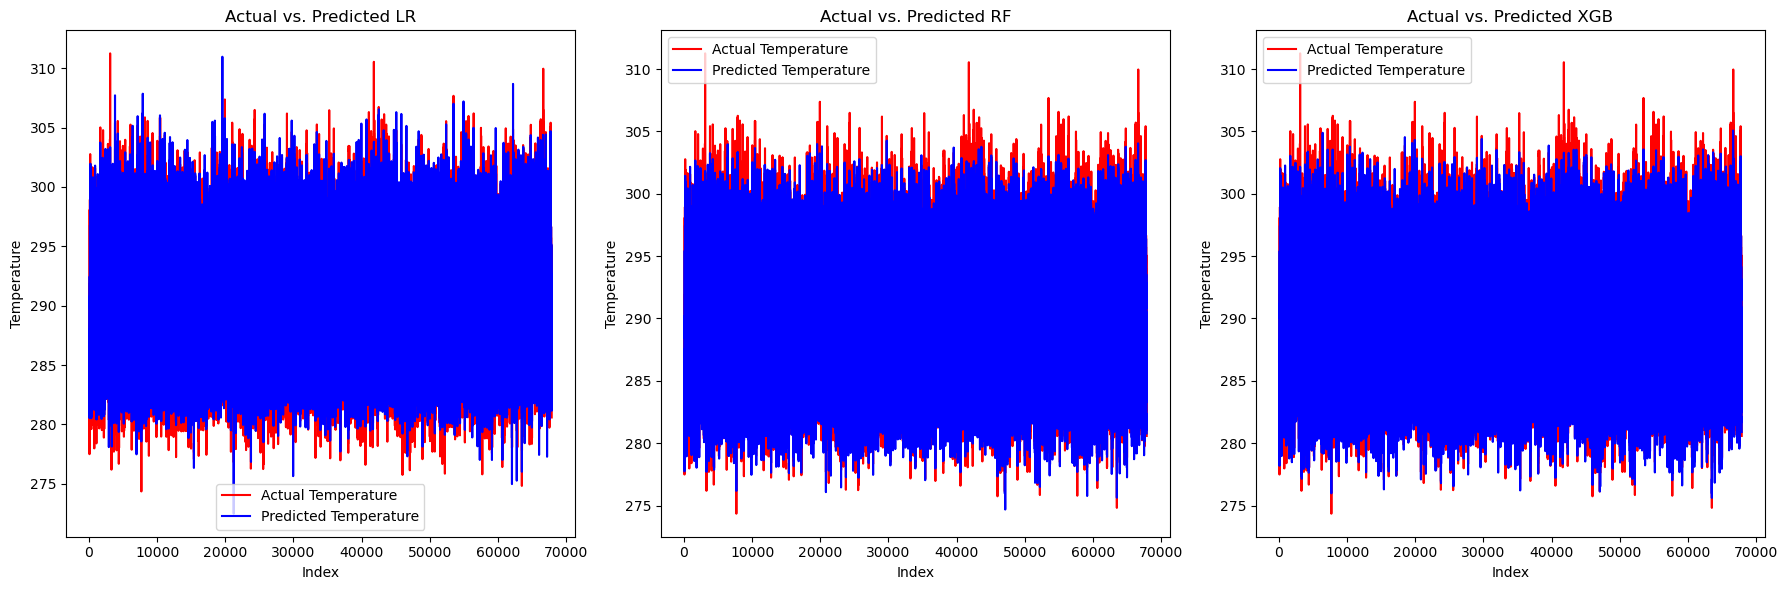

In [15]:
print("\nMetrics for models with seasonality:")
metrics_with_seasonality = all_features_with_seasonality(szn_train_df, szn_test_df)

Inputs: VBOT UBOT FLNS season_enc FSNS QBOT


Metrics for models without PRSN and PRECT:
Metrics:
Linear Regression: R-squared = 0.9196877931066516, RMSE = 1.531897738650146
Random Forest: R-squared = 0.947110334560402, RMSE = 1.2431524922837982
XGBoost: R-squared = 0.948185464945891, RMSE = 1.2304524183273315

Best Model(s): ['XGBoost']


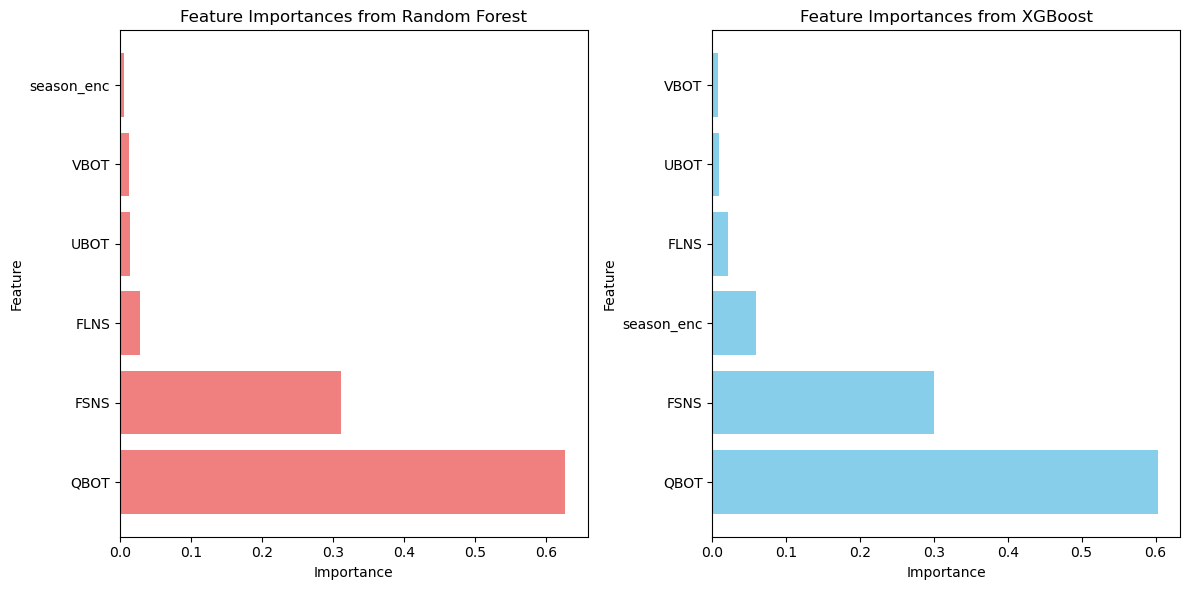

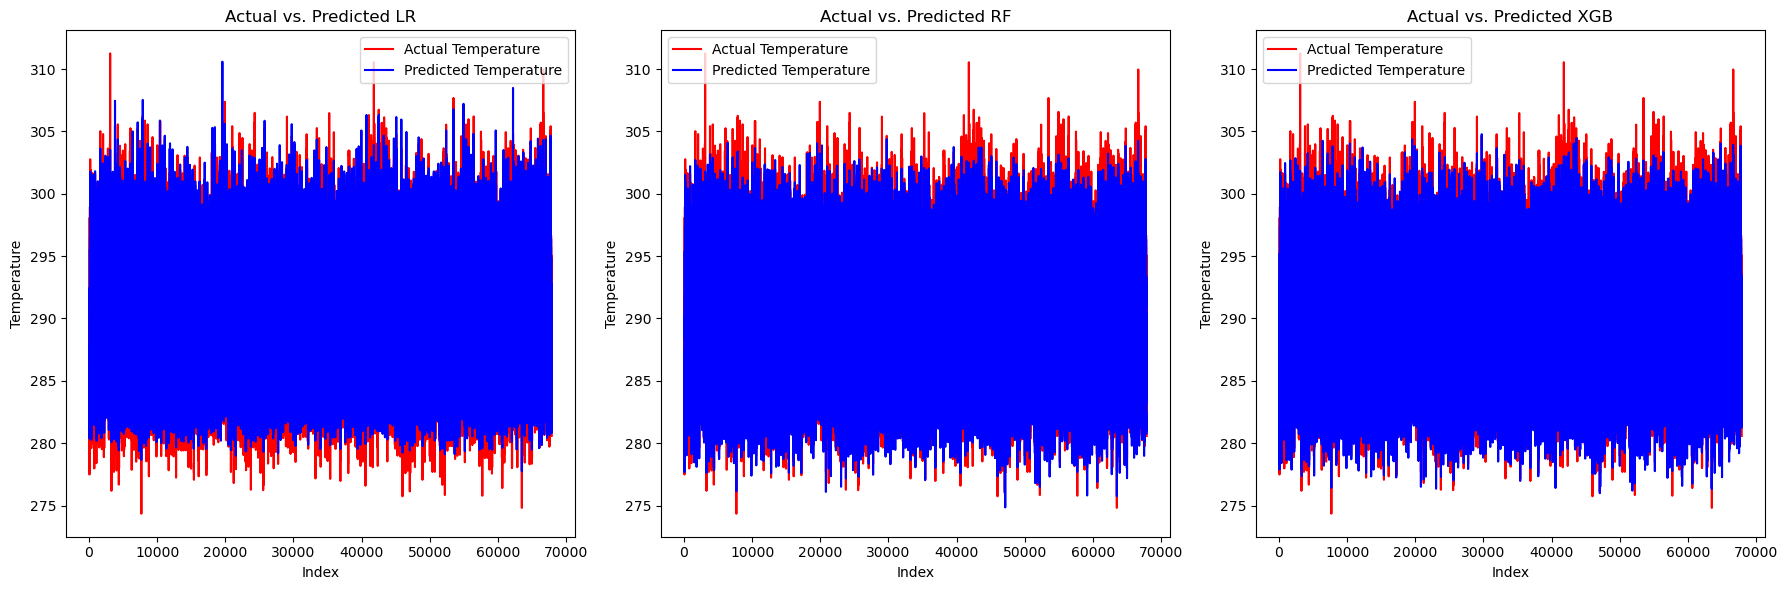

In [16]:
print("\nMetrics for models without PRSN and PRECT:")
metrics_without_prsn_prect = removing_prect_prsn(szn_train_df, szn_test_df)

Inputs: FLNS FSNS QBOT season_enc PRECT and PRSN


Metrics for models without UBOT and VBOT:
Metrics:
Linear Regression: R-squared = 0.919556660456438, RMSE = 1.5331478591842118
Random Forest: R-squared = 0.9342086893257999, RMSE = 1.3865108237953467
XGBoost: R-squared = 0.948533383809679, RMSE = 1.2263143062591553

Best Model(s): ['XGBoost']


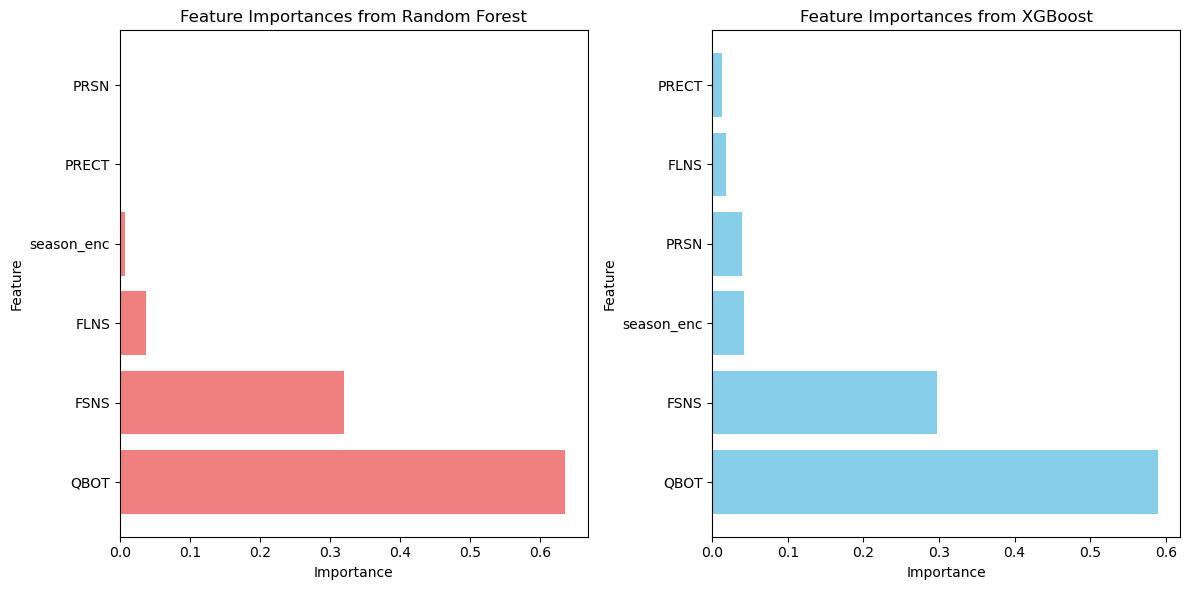

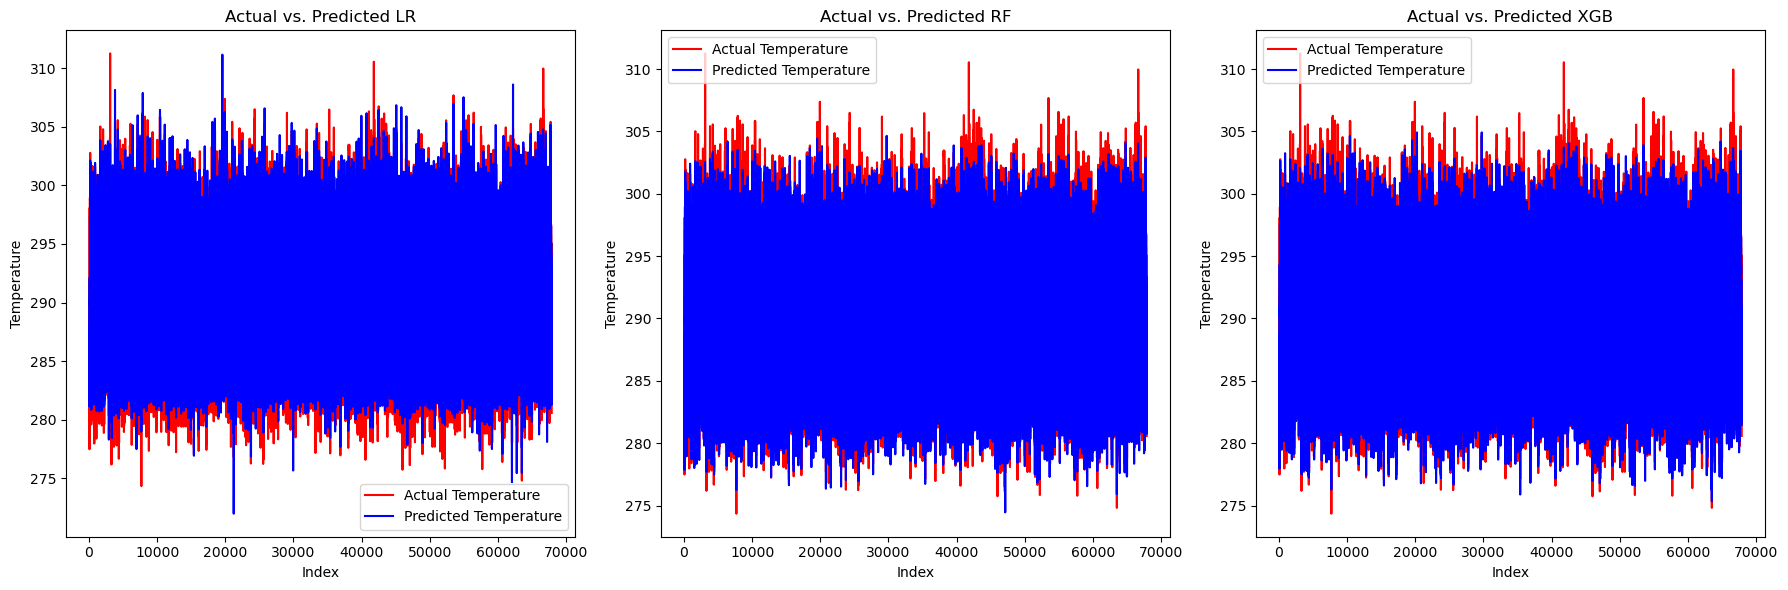

In [17]:
print("\nMetrics for models without UBOT and VBOT:")
metrics_without_ubot_vbot = removing_ubot_vbot(szn_train_df, szn_test_df)


Metrics for models only with QBOT and FLNS:
Metrics:
Linear Regression: R-squared = 0.8515104413375295, RMSE = 2.082988977432251
Random Forest: R-squared = 0.879814998517987, RMSE = 1.8739764619747599
XGBoost: R-squared = 0.891860527895708, RMSE = 1.777588129043579

Best Model(s): ['XGBoost']


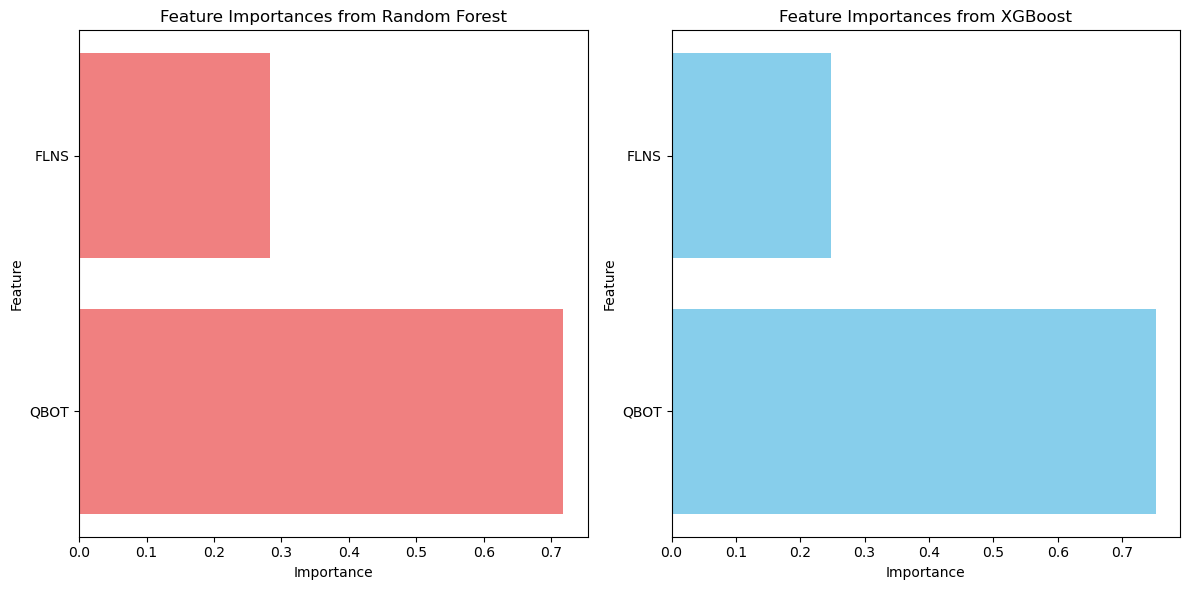

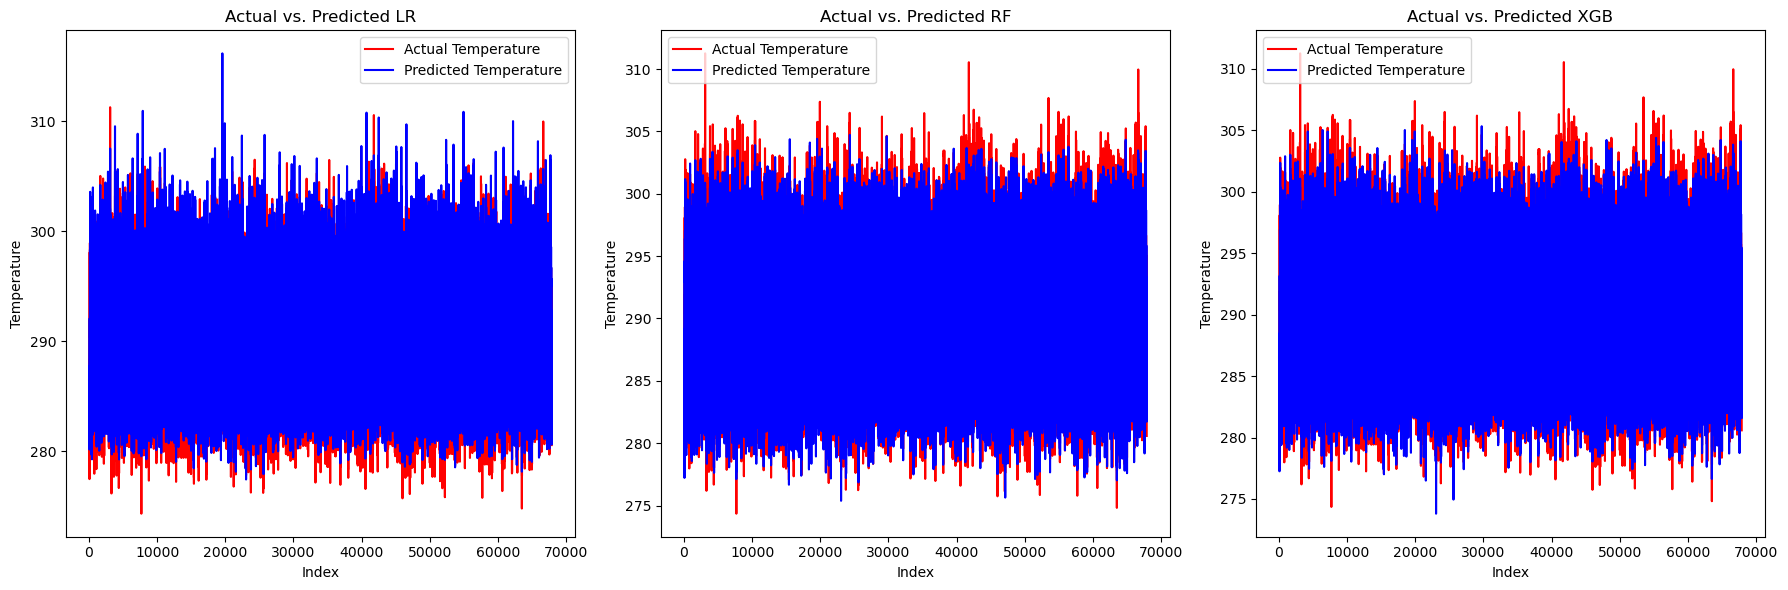

In [18]:
print("\nMetrics for models only with QBOT and FLNS:")
metrics_keeping_qbot_flns = only_qbot_fsns(szn_train_df, szn_test_df)

Best Model: XGBoost, Features: VBOT UBOT PRECT FLNS PRSN season_enc FSNS QBOT, Metrics: R-squared = 0.9568748339094295 (test set), RMSE = 1.1225465536117554 (test set)


Project Reflection

Project 2 is about exploring supervised learning and creating a reproducible environment. For the first part, I have explored the sensitivity of the different inputs to the model and compared 3 algorithms to check which yielded the highest R-squared and lowest RMSE. In all the scenarios that I ran, XGBoost yielded the best results compared to Random Forest and Linear Regression. The best feature set includes VBOT, UBOT, PRECT, FLNS, PRSN, season_enc, FSNS, QBOT in the XGBoost model giving an RMSE score of about 1.12254 and R-squared value of 0.9568, which means the dependent variables are able to explain 95.68% of the variance in the urban temperature.

The EDA that had been conducted in project 1 is aligned with this dataset. Therefore, it enabled me to get leads on feature selection. I have added seasons as one of the features, which has improved the metrics slightly. Moreover, I have consciously excluded the reference height temperature as one of the features as it would introduce significant bias in the model. This is because it is almost similar to the urban temperature. In addition, the feature importance graphs have aided in finalizing the features.

For creating a reproducible environment, I have encapsulated different funtionalities within modules. Moreover, I have attached an environment.yml file to capture the dependencies and configurations of the conda environment that I have used to carry out this project.

Additionally, I have tried to explore another model using the whole dataset excluding the test set to train the model, and then predict for Manchester for the given time frame. However, due to limitation in computational power, I have been unable to. Hence, a way forward could be to explore that. Moreover, using grid search and random search for hyper parameter tuning could improve the metrics further. This was also taking a lot of time, which is why I had to skip it.